In [1]:
import astroquery

In [3]:
astroquery.__version__

'0.4'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits

from photutils import DAOStarFinder
from astropy.stats import mad_std

# an aside about perminance

In [61]:
a = np.arange(100).reshape(10,10)
b = a[2:6,2:6]
b[2,1]

43

In [63]:
b[2,1] = 212

print(b)

[[ 22  23  24  25]
 [ 32  33  34  35]
 [ 42 212  44  45]
 [ 52  53  54  55]]


In [64]:
print(a)

[[  0   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42 212  44  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99]]


# same old, same old (data)

1337.2761 1091.3668


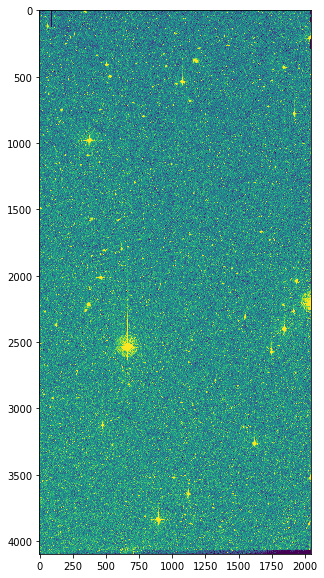

In [13]:
dir_ = '/Users/lockepatton/Desktop/2020-ASTR100/Notes/2020_02_04_Astropy_and_Fits/data/'
imageName = dir_+ 'PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'
f = fits.open(imageName)
data = f[0].data  #This is the image array
header = f[0].header

mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

print(mean, sigma)

#plot the image with some reasonable scale
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma)
plt.show()

# background subtracting

In [14]:
data -=  median

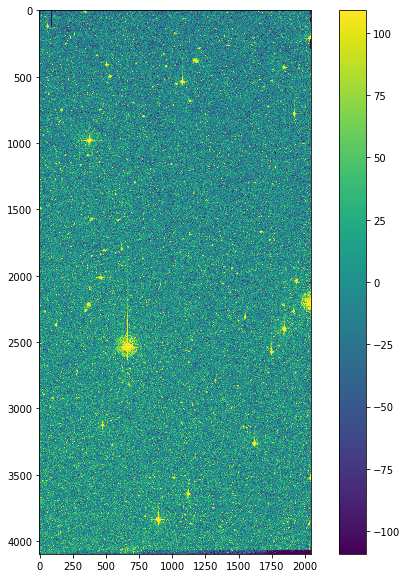

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=-.1*sigma, vmax=+.1*sigma)
plt.colorbar()
plt.show()

# finding sources

In [18]:
bkg_sigma = mad_std(data)
daofind = DAOStarFinder(fwhm=4., threshold=3.*bkg_sigma)
sources = daofind(data)

In [19]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,275.8507265139634,1.3253603219468424,0.4551790526400651,0.41774465933782245,0.643597927708782,25,0.0,44.0191650390625,1.3429653882887251,-0.3201620497862394
2,309.1498225928804,0.9185744378423345,0.6900817141946678,-0.22643572401512552,0.7172330142955059,25,0.0,37.7208251953125,1.043111358831957,-0.04582668656161287
3,885.531351563873,0.5828799140824383,0.476923912240182,0.07448357667232984,-0.17693223622471302,25,0.0,1833.978515625,27.10925488065324,-3.5827939520416017
4,1395.2213316681505,2.5916328999797553,0.25727913408652037,-0.1323173115456779,0.8994863358995931,25,0.0,1.4560546875,1.3745039931923713,-0.3453650147209861
5,1448.8740321015266,1.279321458042276,0.64324450262627,-0.1142287581865785,0.05395461836101342,25,0.0,145.645263671875,2.059462791095162,-0.7843848746009281
6,1945.9686707925305,0.7607615634377038,0.37764937885325006,-0.009250766046730419,0.824414465854687,25,0.0,28.0413818359375,1.4005500256027332,-0.3657465645041239
7,78.50829383699673,2.3737527272773495,0.3608311703892309,-0.39487223092021606,-0.5586905939257311,25,0.0,0.355224609375,1.0035339930291365,-0.003830220172708723
8,105.23617854299205,2.8413963235644353,0.2899621014969375,-0.04092880574911812,0.07288117617319838,25,0.0,-3.2901611328125,1.0134044637352393,-0.014457032231493784
9,145.09697167603565,2.194005598547593,0.5681337624421967,-0.5660967448081116,-0.7857583436610691,25,0.0,57.2249755859375,1.2869866475557366,-0.27393510284188144


In [20]:
from photutils import aperture_photometry, CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

apertures = CircularAperture(positions, r=4.)
phot_table = aperture_photometry(data, apertures)

print(phot_table)  

 id       xcenter            ycenter           aperture_sum   
            pix                pix                            
---- ------------------ ------------------ -------------------
   1  275.8507265139634 1.3253603219468424 -493.84361053017903
   2  309.1498225928804 0.9185744378423345 -1485.5666580818959
   3   885.531351563873 0.5828799140824383  11348.493757073666
   4 1395.2213316681505 2.5916328999797553 -1411.9781172520168
   5 1448.8740321015266  1.279321458042276  -34.24390738853131
   6 1945.9686707925305 0.7607615634377038  -1144.440133701481
   7  78.50829383699673 2.3737527272773495 -1365.4935282133897
   8 105.23617854299205 2.8413963235644353 -1574.9038147052204
   9 145.09697167603565  2.194005598547593 -1105.6612484599943
  10   175.549807813831 2.1104189384023826 -1817.3891812383672
 ...                ...                ...                 ...
8897  1026.630429172495 4086.9028663854256 -1407.8312321838948
8898 2019.2471608310516  4086.653332087379  -6705.11927

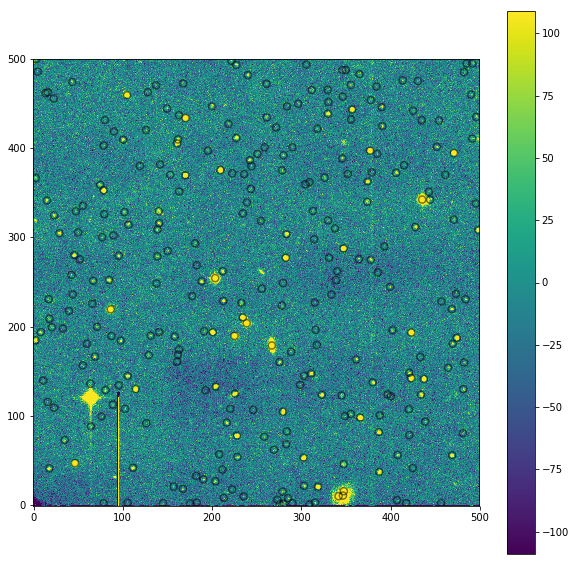

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(data[:500,:500], cmap='viridis', origin='lower', vmin=-.1*sigma, vmax=+.1*sigma)
plt.colorbar()
apertures.plot(color='black', lw=1.5, alpha=0.5)

In [34]:
from photutils import CircularAnnulus

# positions = [(145.1, 168.3), (84.5, 224.1), (48.3, 200.3)]
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)

annulus_masks = annulus_aperture.to_mask(method='center')

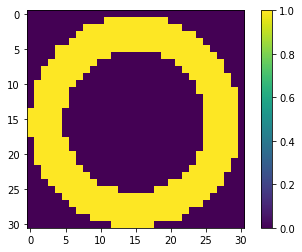

In [35]:
plt.imshow(annulus_masks[0])
plt.colorbar()

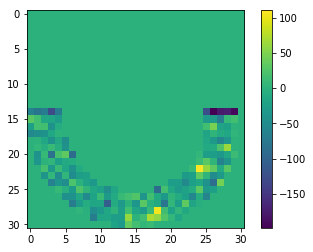

In [36]:
plt.imshow(annulus_masks[0].multiply(data))
plt.colorbar()

 id   xcenter   ycenter   aperture_sum_0 aperture_sum_1
        pix       pix                                  
---- --------- ---------- -------------- --------------
   1 275.85073  1.3253603     -376.32849     -3440.4382
   2 309.14982 0.91857444      -2050.374     -5951.4575
   3 885.53135 0.58287991      11011.421     -5139.4126
   4 1395.2213  2.5916329     -2359.5352     -4278.5584
   5  1448.874  1.2793215     -484.57933     -2843.6512
   6 1945.9687 0.76076156     -1699.7021     -4005.0539
   7 78.508294  2.3737527     -2016.8382     -5195.0465
   8 105.23618  2.8413963      -2311.386      -4475.017
   9 145.09697  2.1940056      -1520.024     -4394.7332
  10 175.54981  2.1104189      -2284.705     -5871.2548
 ...       ...        ...            ...            ...
8897 1026.6304  4086.9029     -2023.4966     -5739.0741
8898 2019.2472  4086.6533     -11512.956     -48240.451
8899 64.116066  4087.6464      335.49716       3570.235
8900 1540.4034  4088.8376      4.8381321     -15

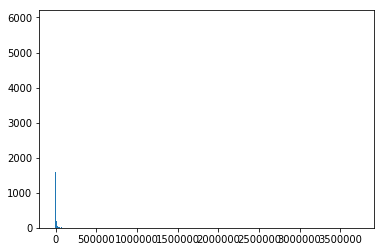

In [46]:
apers = [aperture, annulus_aperture]
phot_table = aperture_photometry(data, apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

plt.hist(phot_table['aperture_sum_0'], bins=1000);

In [51]:
bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area()
bkg_sum = bkg_mean * aperture.area()
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table['residual_aperture_sum'])  

residual_aperture_sum
---------------------
            311.75916
           -860.08253
            12039.304
           -1503.8235
            84.150914
           -898.69133
           -977.82892
           -1416.3826
           -641.07732
            -1110.454
                  ...
           -641.90258
           -875.68177
           -1864.8656
           -378.54984
            3184.0084
           -1667.2486
           -367.45274
            2116.7085
           -2792.2252
           -1726.9699
            1299.2703
Length = 8906 rows


In [57]:
len(phot_table[phot_table['residual_aperture_sum']>0])

6066

In [58]:
len(phot_table)

8906